In [20]:
import networkx as nx
import matplotlib.pyplot as plt


In [21]:
G=nx.Graph()

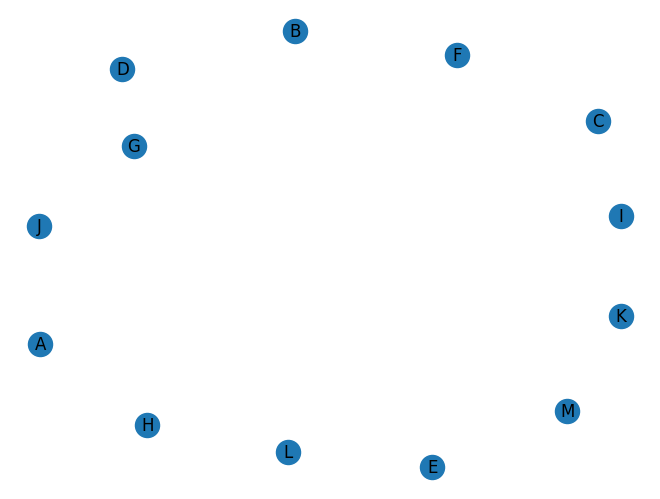

In [22]:
G.add_nodes_from(['A','B','C','D','E','F','G','H','I','J','K','M','L'])
nx.draw(G,with_labels=True)


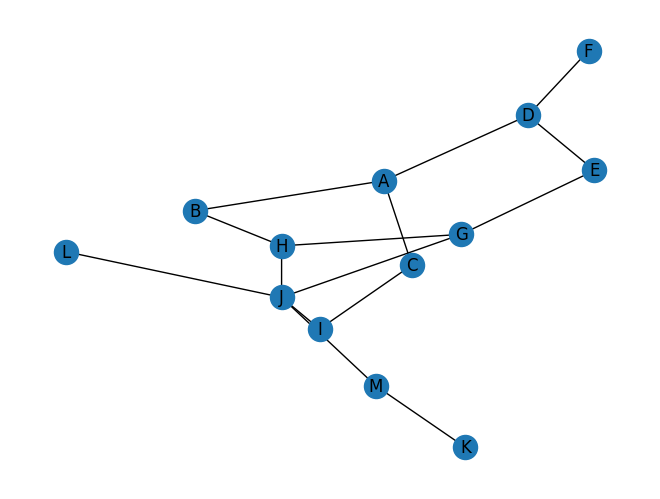

In [23]:
G.add_edge(*('A','B'))
G.add_edge(*('A','C'))
G.add_edge(*('A','D'))
G.add_edge(*('B','H'))
G.add_edge(*('C','I'))
G.add_edge(*('D','E'))
G.add_edge(*('D','F'))
G.add_edge(*('E','G'))
G.add_edge(*('G','H'))
G.add_edge(*('G','J'))
G.add_edge(*('H','J'))
G.add_edge(*('I','J'))
G.add_edge(*('K','M'))
G.add_edge(*('M','J'))
G.add_edge(*('L','J'))
nx.draw(G,with_labels=True)

In [24]:
display(G.adj)

AdjacencyView({'A': {'B': {}, 'C': {}, 'D': {}}, 'B': {'A': {}, 'H': {}}, 'C': {'A': {}, 'I': {}}, 'D': {'A': {}, 'E': {}, 'F': {}}, 'E': {'D': {}, 'G': {}}, 'F': {'D': {}}, 'G': {'E': {}, 'H': {}, 'J': {}}, 'H': {'B': {}, 'G': {}, 'J': {}}, 'I': {'C': {}, 'J': {}}, 'J': {'G': {}, 'H': {}, 'I': {}, 'M': {}, 'L': {}}, 'K': {'M': {}}, 'M': {'K': {}, 'J': {}}, 'L': {'J': {}}})

In [25]:
G.number_of_nodes()

13

In [26]:
G.number_of_edges()

15

In [27]:
visited = []
queue = []  

def bfs(visited, G, node): 
  visited.append(node)
  queue.append(node)

  while queue:      
    m = queue.pop(0) 
    print (m, end = " ") 

    for neighbour in G[m]:
      if neighbour not in visited:
        visited.append(neighbour)
        queue.append(neighbour)

print("Shortest path between A and K nodes is:")
bfs(visited, G,  'A')  

Shortest path between A and K nodes is:
A B C D H I E F G J M L K 

In [28]:
import networkx as nx
import numpy as np

def clustering_coef(G):
    tr = dict()
    for e in list(G.edges()):
        u = e[0]
        v = e[1]
        nr_u = G[u]
        nr_v = G[v]
        for w in nr_u:
            if (w in nr_v):
                tr[u] = tr.get(u, 0) + 1
                tr[v] = tr.get(v, 0) + 1

    C = 0
    for u in G:
        if (G.degree[u] > 1):
            val = (tr.get(u, 0)/2) * 2 / (G.degree[u] * (G.degree[u]-1))
            #divided by 2 because each triangle is counted twice in the dictionary. Thus dividing by 2 (and then multiplying by 2, due to CC formula)
            C += val
    C = C / len(G) #Average of Cluster cofficients of graph nodes
    return C

print(clustering_coef(G))

0.05897435897435897


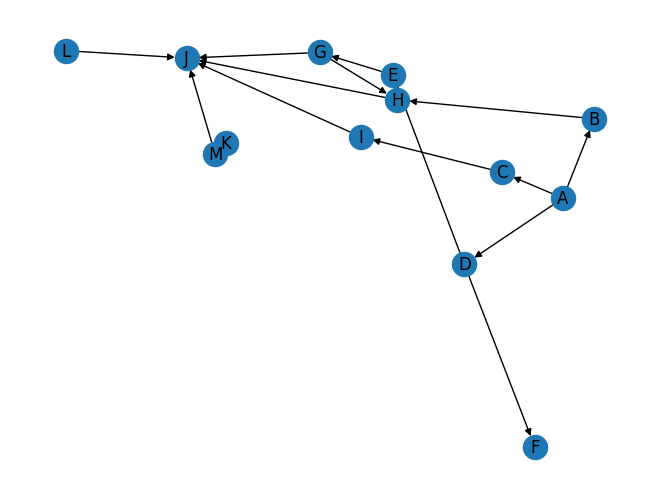

In [29]:
DG = nx.DiGraph()
DG.add_nodes_from(['A','B','C','D','E','F','G','H','I','J','K','M','L'])
DG.add_edge('A','B')
DG.add_edge('A','C')
DG.add_edge('A','D')
DG.add_edge('B','H')
DG.add_edge('C','I')
DG.add_edge('D','E')
DG.add_edge('D','F')
DG.add_edge('E','G')
DG.add_edge('G','H')
DG.add_edge('G','J')
DG.add_edge('H','J')
DG.add_edge('I','J')
DG.add_edge('K','M')
DG.add_edge('M','J')
DG.add_edge('L','J')
nx.draw(DG,with_labels=True)

In [30]:
A = nx.adjacency_matrix(G)
print(A.todense())

[[0 1 1 1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1 0 0 1 0 0 0]
 [0 0 1 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0]]


In [31]:
import pprint
row_num = 13
col_num = 13
adjacency_matrix = []
for i in range(row_num):
    row = []
    for j in range(col_num):
        row.append(0)
    adjacency_matrix.append(row)
edges = [(1,2),(1,3),(1,4),(2,8),(3,9),(4,5),(4,6),(5,7),(7,8),(7,10),(8,10),(9,10),(11,12),(12,10),(13,10)]
for edge in edges:
    row = edge[0]
    col = edge[1]
    adjacency_matrix[row - 1][col - 1] = 1
    adjacency_matrix[col - 1][row - 1] = 1

print("The edges in the graph are:")
print(edges)
print("The adjacency matrix is:")
pprint.pprint(adjacency_matrix)

The edges in the graph are:
[(1, 2), (1, 3), (1, 4), (2, 8), (3, 9), (4, 5), (4, 6), (5, 7), (7, 8), (7, 10), (8, 10), (9, 10), (11, 12), (12, 10), (13, 10)]
The adjacency matrix is:
[[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]]


In [32]:
A = nx.adjacency_matrix(DG)
print(A.todense())

[[0 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0]]


In [33]:
import pprint
row_num = 13
col_num = 13
adjacency_matrix = []
for i in range(row_num):
    row = []
    for j in range(col_num):
        row.append(0)
    adjacency_matrix.append(row)
edges = [(1,2),(1,3),(1,4),(2,8),(3,9),(4,5),(4,6),(5,7),(7,8),(7,10),(8,10),(9,10),(11,12),(12,10),(13,10)]
for edge in edges:
    row = edge[0]
    col = edge[1]
    adjacency_matrix[row - 1][col - 1] = 1


print("The edges in the directed graph are:")
print(edges)
print("The adjacency matrix is:")
pprint.pprint(adjacency_matrix)

The edges in the directed graph are:
[(1, 2), (1, 3), (1, 4), (2, 8), (3, 9), (4, 5), (4, 6), (5, 7), (7, 8), (7, 10), (8, 10), (9, 10), (11, 12), (12, 10), (13, 10)]
The adjacency matrix is:
[[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]]
